<a href="https://colab.research.google.com/github/sur21/Heart-Prediction-using-Logistic-regression/blob/main/HeartDiseaseLRModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [ ]:
heart= pd.read_csv('dataset_heart.csv')

In [ ]:
heart.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [ ]:
print("Number of Rows: ", heart.shape[0])
print("Number of Columns: ", heart.shape[1])


Number of Rows:  270
Number of Columns:  14


In [ ]:
heart.isnull().sum()

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64

In [ ]:
heart.isnull().sum().sum()

0

In [ ]:
heart.describe().T.style.background_gradient(cmap = "Reds")

,count,mean,std,min,25%,50%,75%,max
age,270.000000,54.433333,9.109067,29.000000,48.000000,55.000000,61.000000,77.000000
sex,270.000000,0.677778,0.468195,0.000000,0.000000,1.000000,1.000000,1.000000
chest pain type,270.000000,3.174074,0.950090,1.000000,3.000000,3.000000,4.000000,4.000000
resting blood pressure,270.000000,131.344444,17.861608,94.000000,120.000000,130.000000,140.000000,200.000000
serum cholestoral,270.000000,249.659259,51.686237,126.000000,213.000000,245.000000,280.000000,564.000000
fasting blood sugar,270.000000,0.148148,0.355906,0.000000,0.000000,0.000000,0.000000,1.000000
resting electrocardiographic results,270.000000,1.022222,0.997891,0.000000,0.000000,2.000000,2.000000,2.000000
max heart rate,270.000000,149.677778,23.165717,71.000000,133.000000,153.500000,166.000000,202.000000
exercise induced angina,270.000000,0.329630,0.470952,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,270.000000,1.050000,1.145210,0.000000,0.000000,0.800000,1.600000,6.200000


In [ ]:
heart.columns

Index(['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')

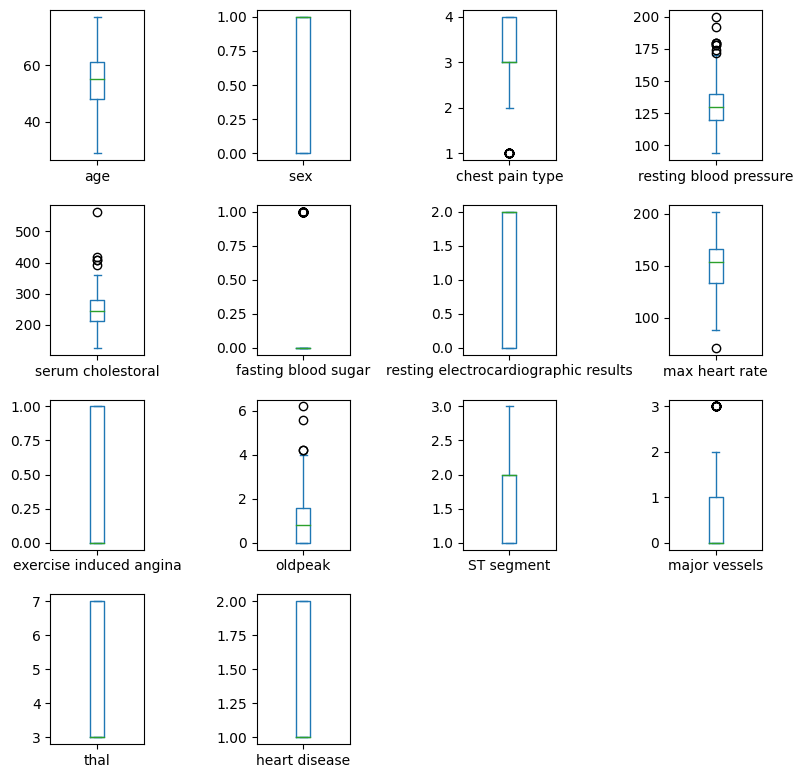

In [ ]:

names = ['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease']


plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


heart.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(8, 8), y=names)


plt.tight_layout()
plt.show()

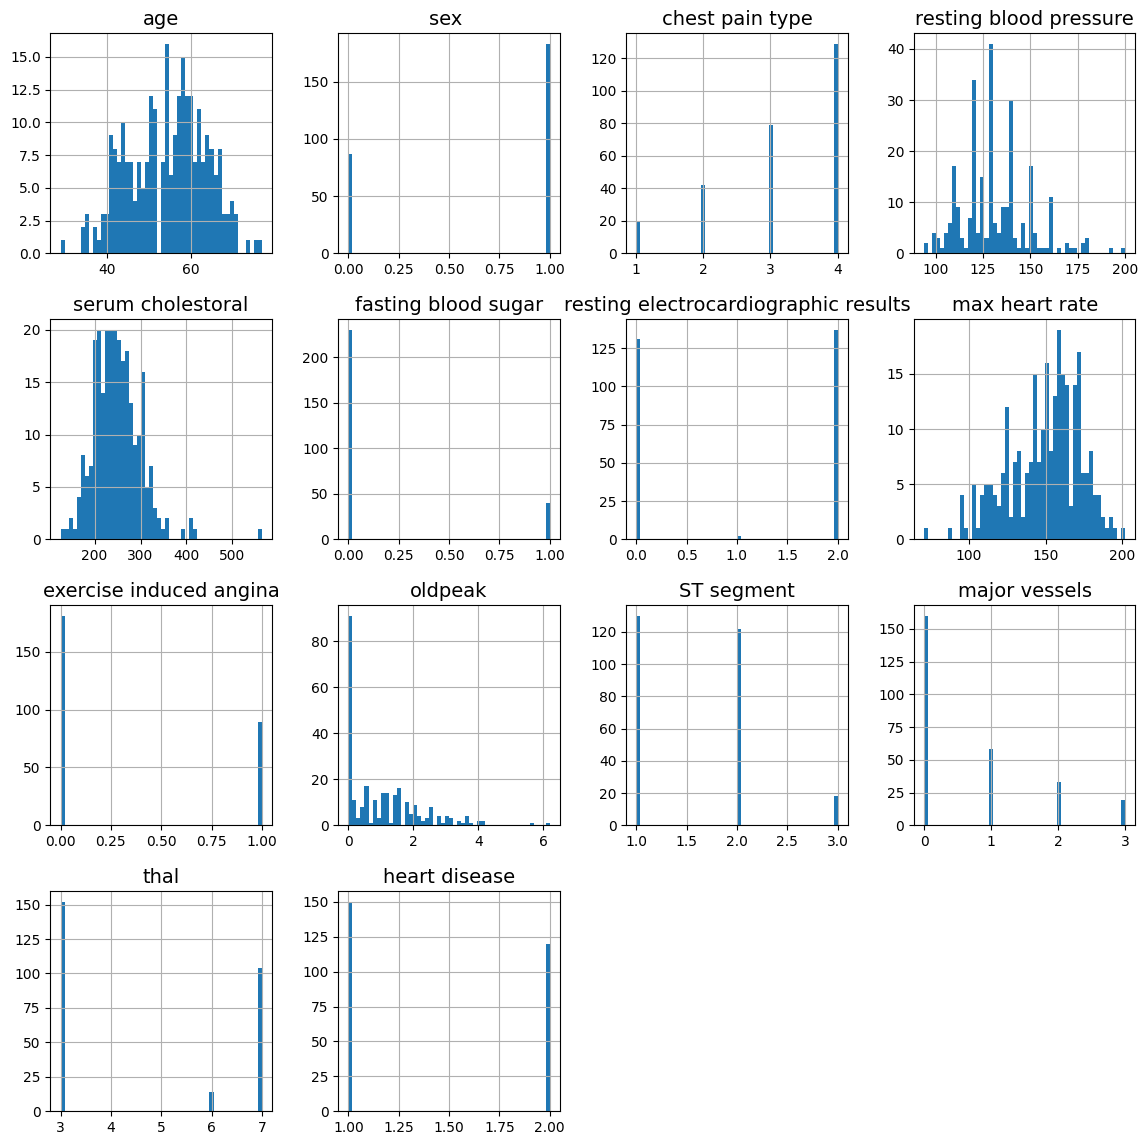

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

heart.hist(bins=50, figsize=(14, 14))

plt.show()

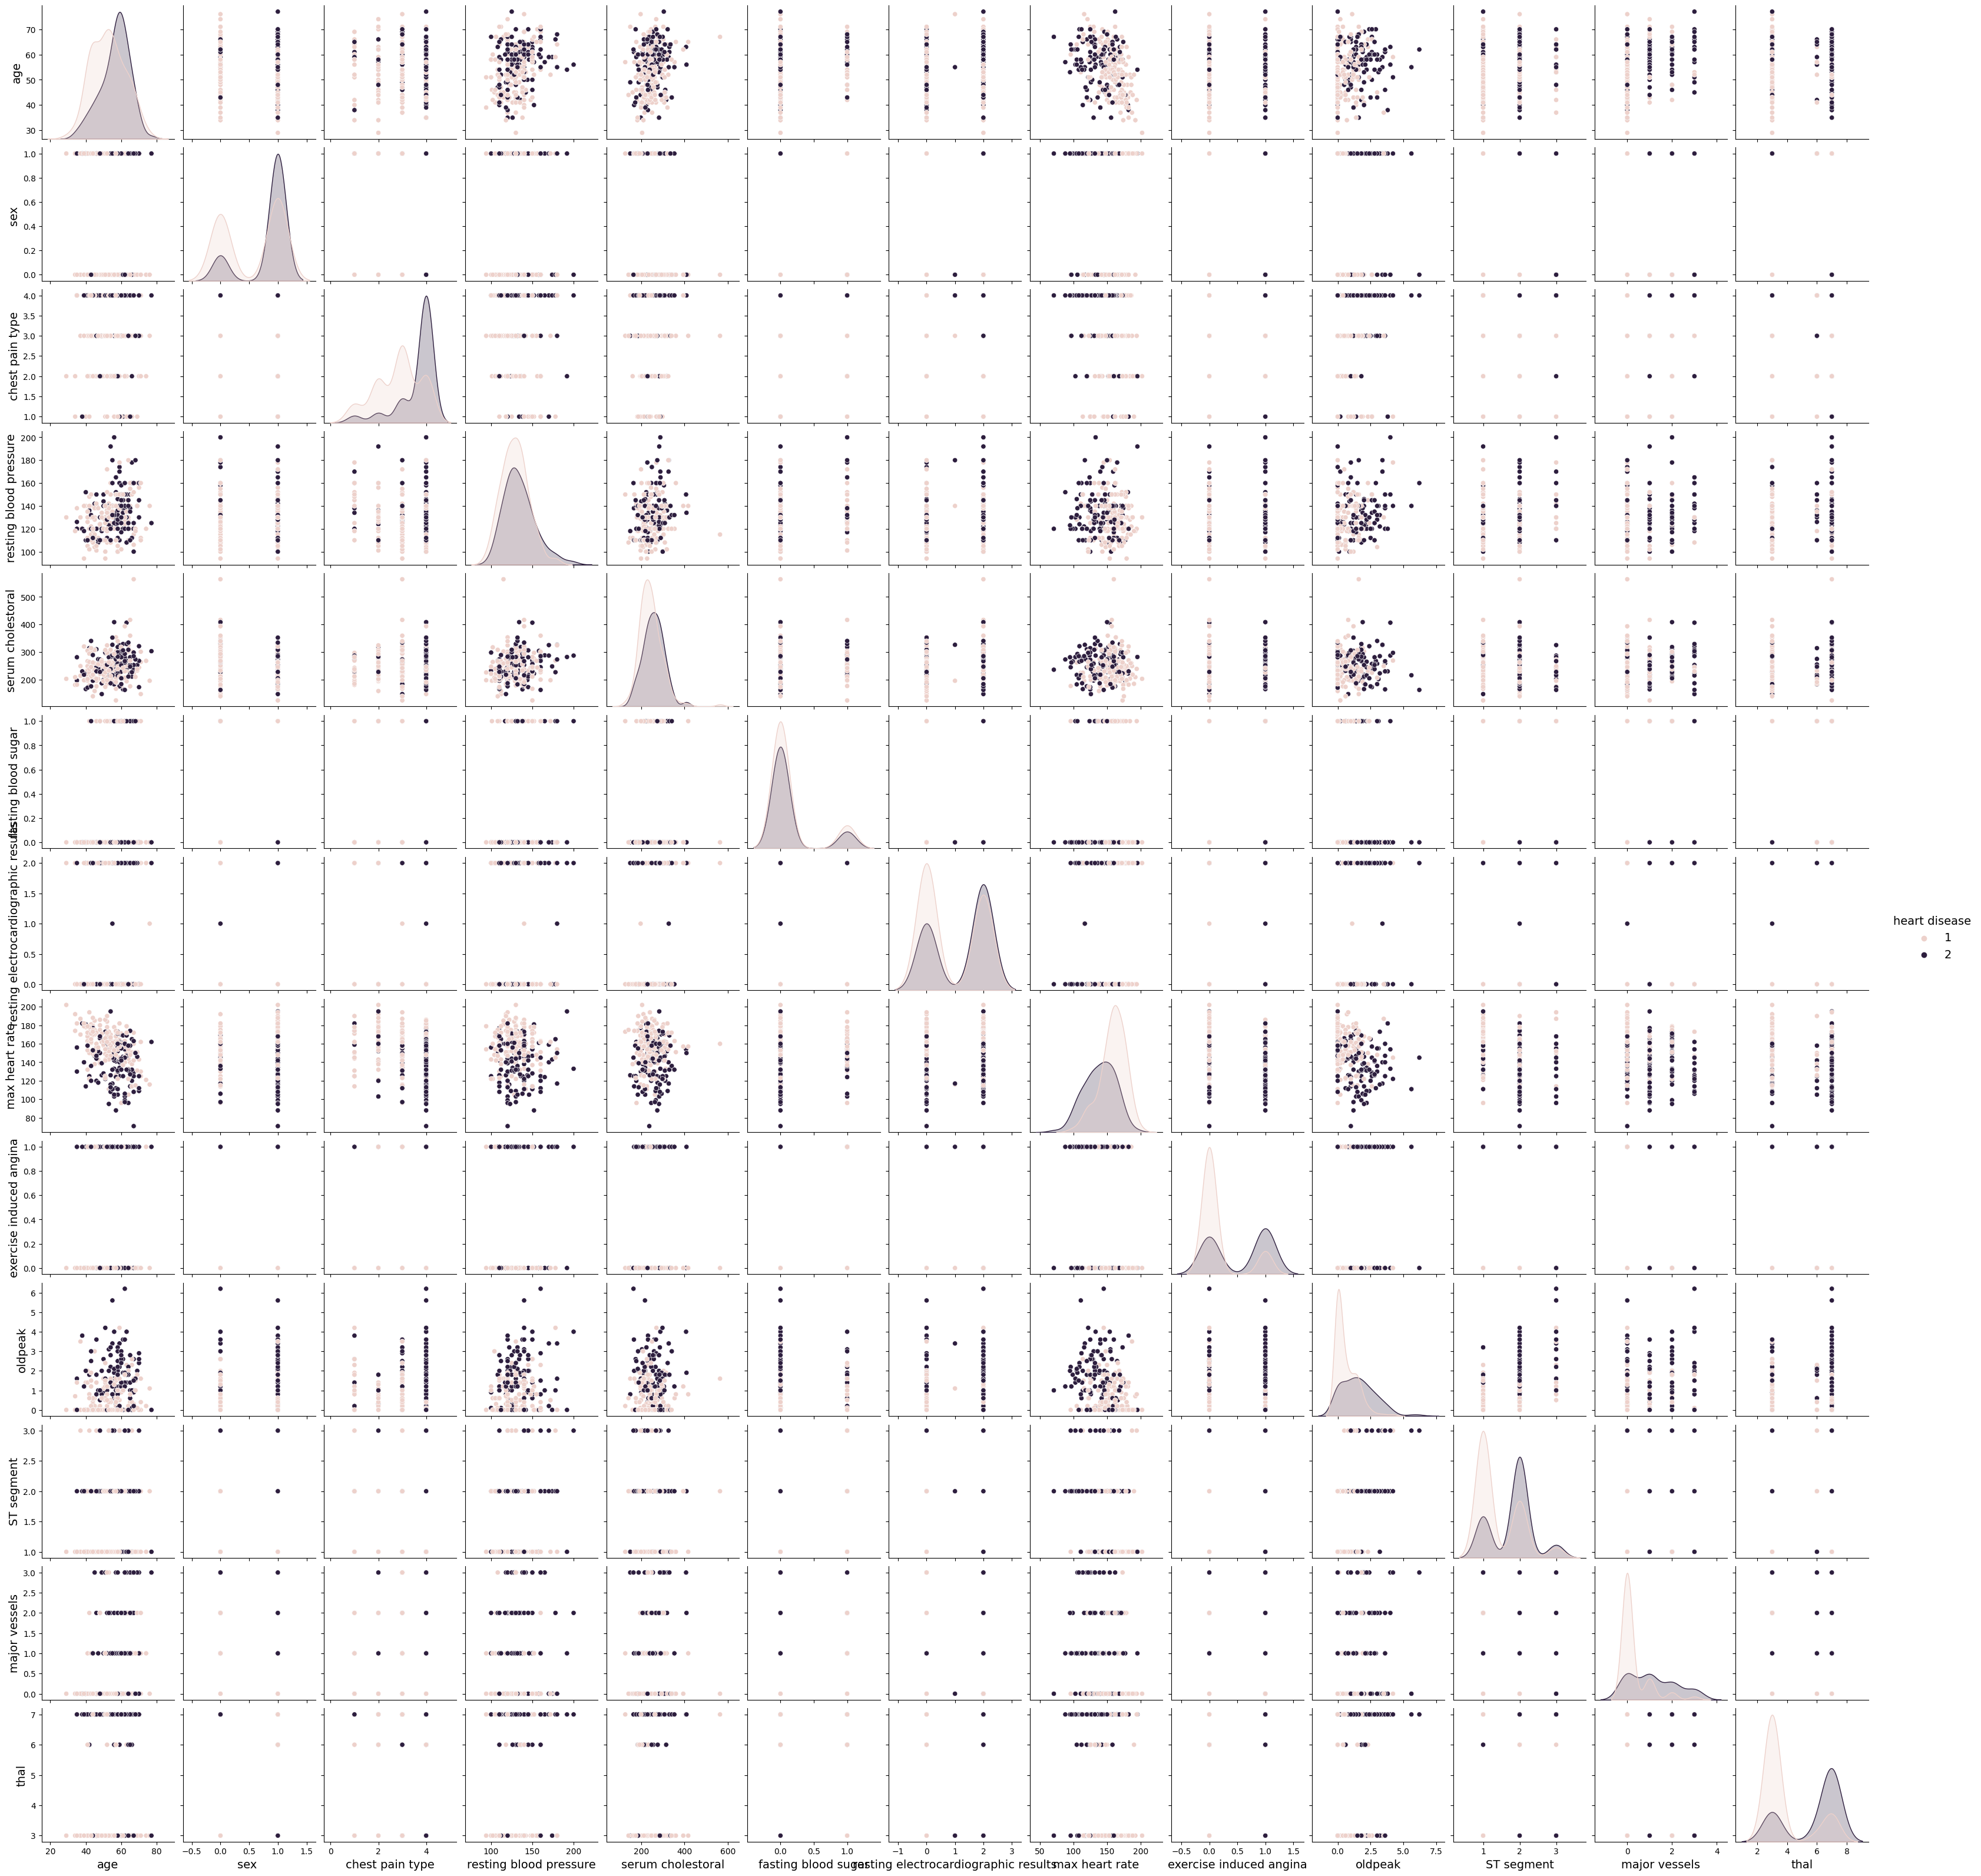

In [ ]:
sns.pairplot(heart,hue='heart disease')

In [ ]:
heart[heart.duplicated()]

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease


In [ ]:

print(heart['heart disease'].value_counts())

1    150
2    120
Name: heart disease, dtype: int64


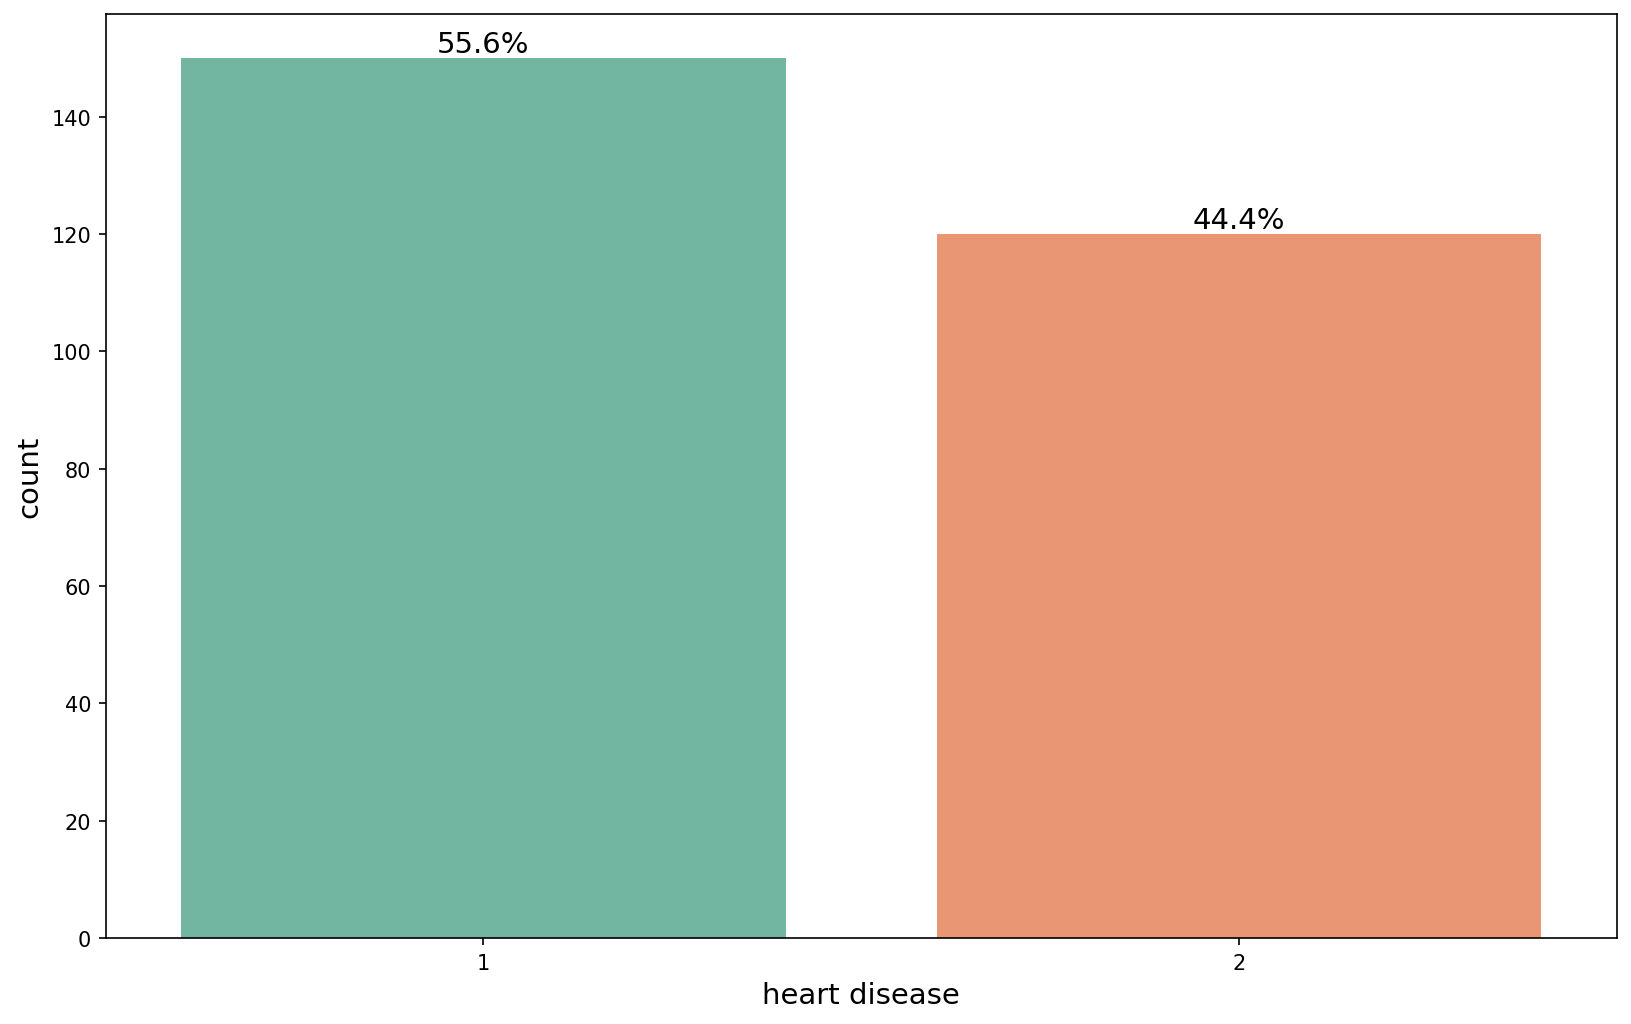

In [ ]:
plt.figure(figsize=(13,8),dpi=150)
ax = sns.countplot(data=heart, x='heart disease', palette="Set2")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(heart)), (x.mean(), y),
            ha='center', va='bottom')

In [ ]:
X=heart.drop('heart disease',axis=1)
y=heart['heart disease']

In [ ]:
X

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [ ]:
y


0      2
1      1
2      2
3      1
4      1
      ..
265    1
266    1
267    1
268    1
269    2
Name: heart disease, Length: 270, dtype: int64

In [ ]:
corr_matrix = X.corr()

In [ ]:
import seaborn as sns
plt.figure(figsize = (14,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'Reds')
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='oldpeak',y='ST segment',data=heart,hue='heart disease',s=200,alpha=0.9,palette='Set2')
plt.legend(bbox_to_anchor=(1.2,0.5),title="heart disease")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)